# Hyperparameter Tunning for the K-Means Clustering Algorithm
In a nutshell, since in clustering we are mostly operating under the assumption that the data are unlabelled (otherwise we might as well use classical machine learning), there is no notion of data generalization nor a propper metric for comparing different sets of hyperparameters in order to assess which one yields the best performance (using cross validation). Therefore, this is a method for finding the optimal value of K given a set of data.

## Get Dependencies

In [1]:
!rm -r CLUSTERING_ALGORITHMS utils
!git clone https://github.com/Q-b1t/CLUSTERING_ALGORITHMS.git
!mkdir utils && cp /content/CLUSTERING_ALGORITHMS/data_utils/* utils && cp /content/CLUSTERING_ALGORITHMS/SOFT_K_MEAN_CLUSTERING/SoftKMeanClustering.py utils

Cloning into 'CLUSTERING_ALGORITHMS'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 53 (delta 21), reused 43 (delta 11), pack-reused 0
Receiving objects: 100% (53/53), 9.60 KiB | 9.60 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils.clustering_data_utils import *
from utils.SoftKMeanClustering import SoftKMeansClustering

## Get data

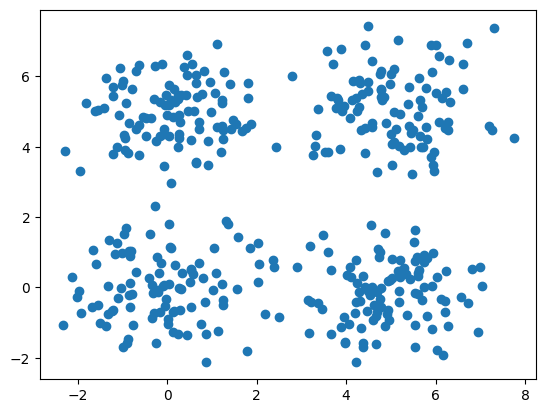

In [3]:
X,_ = get_sample_cluster_data()
plt.scatter(X[:,0],X[:,1])

In [4]:
# initialize placehodlers for running the experiment
costs = list() # holding the final cost of the final iteration of each model's training phase
models = list() # holding the models
desicion_boundaries = list() # hold each models desicion boundaries
# no cost is associated the k = 0, so the experiment will not tbe run for this value
costs.append(None)
models.append(None)
desicion_boundaries.append(None)

In [5]:
for k in range(1, 10):
  model = SoftKMeansClustering(max_iterations=20)
  M,R,costs_ = model.fit(X,k)
  c = costs_[-1]
  costs.append(c)
  models.append(model)

100%|██████████| 20/20 [00:00<00:00, 26.10it/s]


Text(0, 0.5, 'Costs')

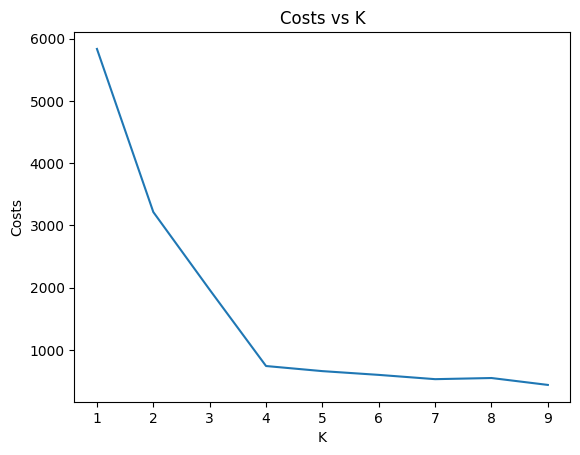

In [6]:
plt.plot(costs)
plt.title("Costs vs K")
plt.xlabel("K")
plt.ylabel("Costs")

From the graph, we can see that the threshold is around 4 clusters. We can continue increasing the cluster number beyond 4, but for this particular clase the improvements will be marginal to the point we might as well consider them despicable. In the graphs below, one can appreciate that the clustering classes tend to become kinda weird and mismatching with the clusters when k>4.

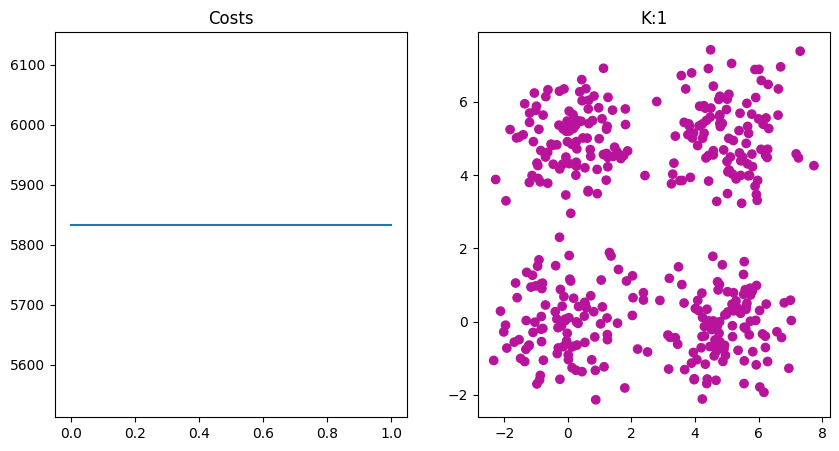

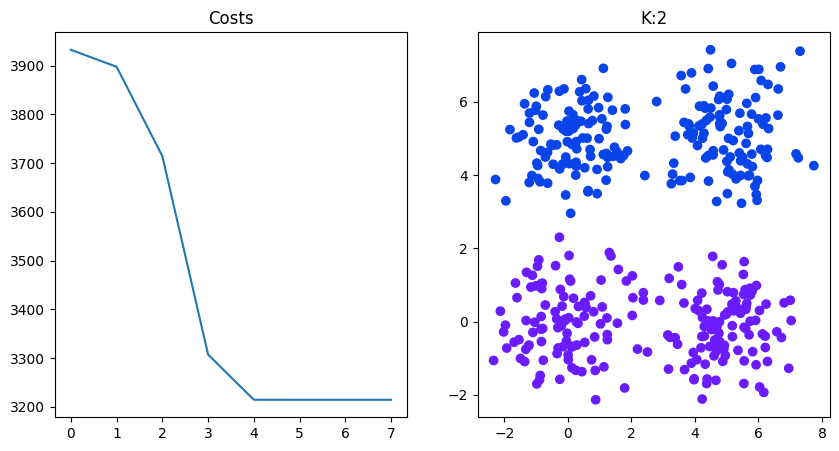

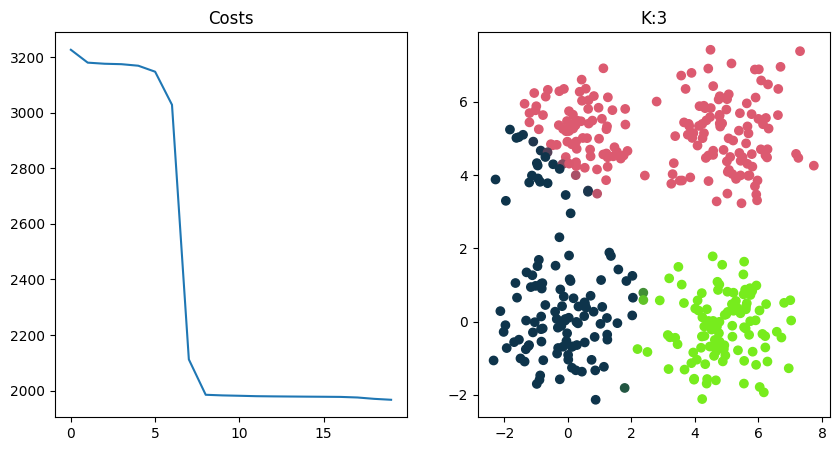

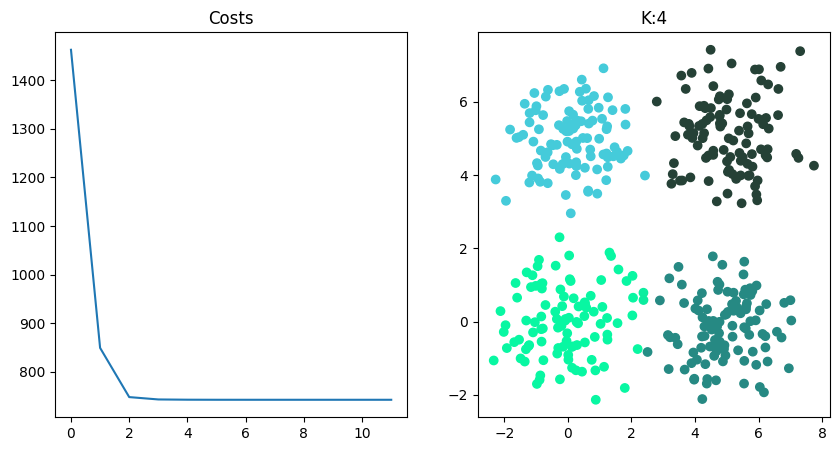

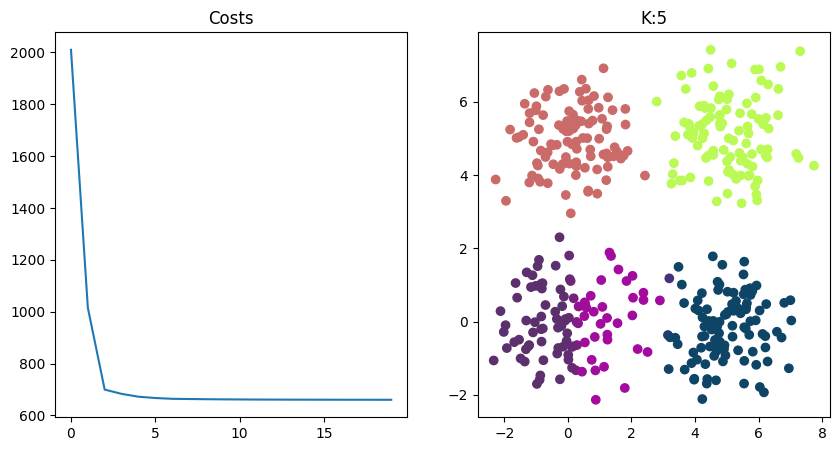

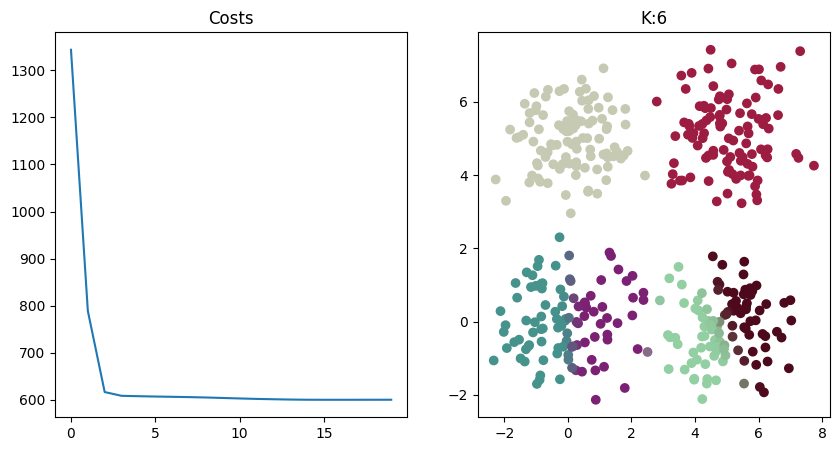

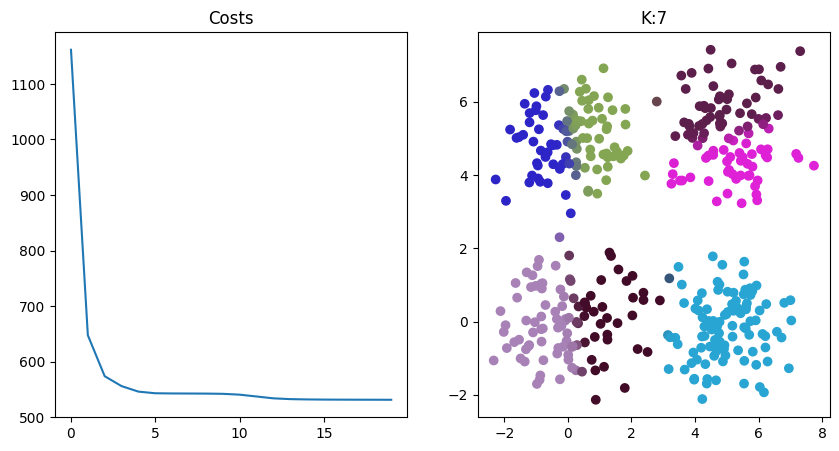

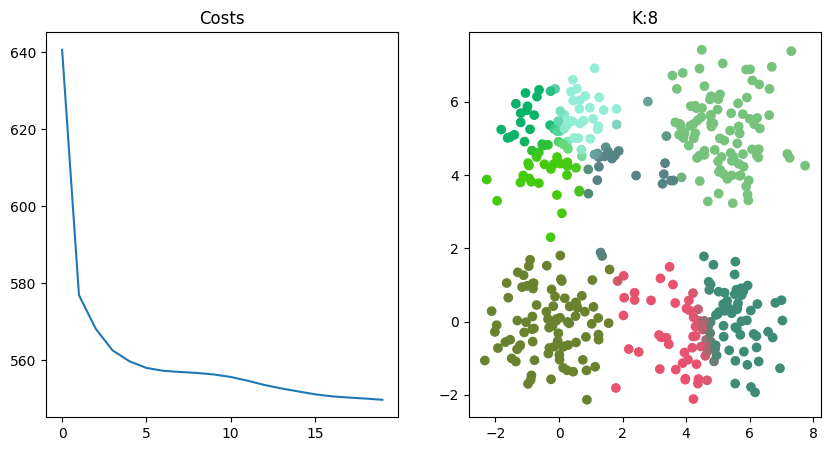

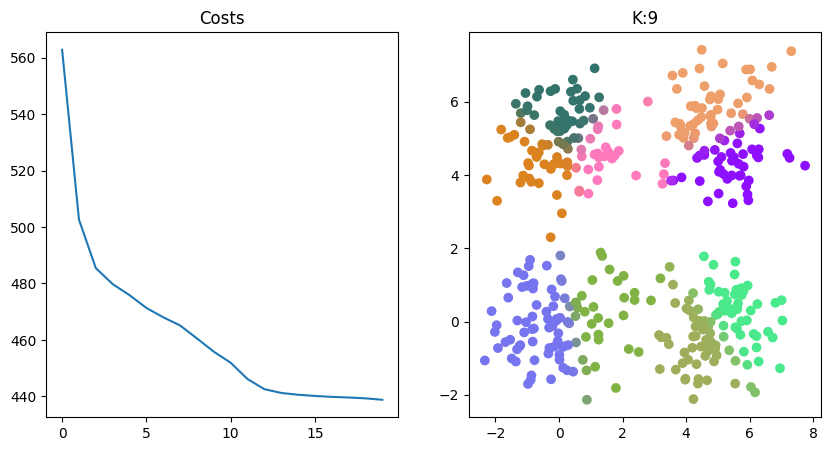

In [10]:
for i in range(1,10):
  models[i].plot_clustering_results(X)